INPUT DATASET

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

In [3]:
#Loading the dataset

#loading the assay 
pd.set_option('display.max_rows', None)
df_assay = pd.read_csv(r"C:\Users\FERDI\ta\latihan\ASSAY.csv")
df_assay.reset_index(inplace = True)
df_assay.rename(columns = {'index' : 'index'}, inplace = True)
df_assay.head(5)

,index,BHID,Fr.,To,Interval,Total Ni,Total Co,Total Fe,Total SiO2,Total MgO
0,0,NESW1,0.0,1.0,1.0,0.50,0.05,46.2,2.4,1.5
1,1,NESW1,1.0,2.0,1.0,0.72,0.05,44.4,2.6,1.6
2,2,NESW1,2.0,3.0,1.0,0.89,0.06,44.8,3.0,1.6
3,3,NESW1,3.0,4.0,1.0,0.98,0.07,45.4,2.7,1.3
4,4,NESW1,4.0,5.0,1.0,0.90,0.06,43.9,2.7,1.3


In [33]:
#loading the assay 

df_litology = pd.read_csv(r"C:\Users\FERDI\ta\latihan\LITOLOGI.csv")
df_litology.reset_index(inplace = True)
df_litology.rename(columns = {'index' : 'index'}).head(5)

,index,BHID,Fr.,To,Total Ni,Total Co,Total Fe,Total SiO2,Total MgO,LITOLOGI
0,0,NESW1,0.0,1.0,0.50,0.05,46.2,2.4,1.5,WASTE
1,1,NESW1,1.0,2.0,0.72,0.05,44.4,2.6,1.6,WASTE
2,2,NESW1,2.0,3.0,0.89,0.06,44.8,3.0,1.6,WASTE
3,3,NESW1,3.0,4.0,0.98,0.07,45.4,2.7,1.3,WASTE
4,4,NESW1,4.0,5.0,0.90,0.06,43.9,2.7,1.3,WASTE


In [34]:
#Merge assay and litology dataset

merged_df = pd.merge(df_litology, df_assay, on='index', how='outer')
merged_df.head(5)

,index,BHID_x,Fr._x,To_x,Total Ni_x,Total Co_x,Total Fe_x,Total SiO2_x,Total MgO_x,LITOLOGI,BHID_y,Fr._y,To_y,Interval,Total Ni_y,Total Co_y,Total Fe_y,Total SiO2_y,Total MgO_y
0,0,NESW1,0.0,1.0,0.50,0.05,46.2,2.4,1.5,WASTE,NESW1,0.0,1.0,1.0,0.50,0.05,46.2,2.4,1.5
1,1,NESW1,1.0,2.0,0.72,0.05,44.4,2.6,1.6,WASTE,NESW1,1.0,2.0,1.0,0.72,0.05,44.4,2.6,1.6
2,2,NESW1,2.0,3.0,0.89,0.06,44.8,3.0,1.6,WASTE,NESW1,2.0,3.0,1.0,0.89,0.06,44.8,3.0,1.6
3,3,NESW1,3.0,4.0,0.98,0.07,45.4,2.7,1.3,WASTE,NESW1,3.0,4.0,1.0,0.98,0.07,45.4,2.7,1.3
4,4,NESW1,4.0,5.0,0.90,0.06,43.9,2.7,1.3,WASTE,NESW1,4.0,5.0,1.0,0.90,0.06,43.9,2.7,1.3


DATA CLEANING

In [35]:
merged_df.drop(['BHID_y','Fr._y','To_y','Total MgO_y','Total Ni_y','Total Co_y','Total Fe_y','Total SiO2_y'], axis = 1, inplace = True)
merged_df.head(5)

,index,BHID_x,Fr._x,To_x,Total Ni_x,Total Co_x,Total Fe_x,Total SiO2_x,Total MgO_x,LITOLOGI,Interval
0,0,NESW1,0.0,1.0,0.50,0.05,46.2,2.4,1.5,WASTE,1.0
1,1,NESW1,1.0,2.0,0.72,0.05,44.4,2.6,1.6,WASTE,1.0
2,2,NESW1,2.0,3.0,0.89,0.06,44.8,3.0,1.6,WASTE,1.0
3,3,NESW1,3.0,4.0,0.98,0.07,45.4,2.7,1.3,WASTE,1.0
4,4,NESW1,4.0,5.0,0.90,0.06,43.9,2.7,1.3,WASTE,1.0


In [36]:
# Drop Duplicates 

merged_df.drop_duplicates().head(5)

,index,BHID_x,Fr._x,To_x,Total Ni_x,Total Co_x,Total Fe_x,Total SiO2_x,Total MgO_x,LITOLOGI,Interval
0,0,NESW1,0.0,1.0,0.50,0.05,46.2,2.4,1.5,WASTE,1.0
1,1,NESW1,1.0,2.0,0.72,0.05,44.4,2.6,1.6,WASTE,1.0
2,2,NESW1,2.0,3.0,0.89,0.06,44.8,3.0,1.6,WASTE,1.0
3,3,NESW1,3.0,4.0,0.98,0.07,45.4,2.7,1.3,WASTE,1.0
4,4,NESW1,4.0,5.0,0.90,0.06,43.9,2.7,1.3,WASTE,1.0


In [8]:
# Drop Index Column

merged_df.drop('index',axis = 1 , inplace =True)

DATA EXPLORATION

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3205 entries, 0 to 3204
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BHID_x        3205 non-null   object 
 1   Fr._x         3205 non-null   float64
 2   To_x          3205 non-null   float64
 3   Total Ni_x    3205 non-null   float64
 4   Total Co_x    3205 non-null   float64
 5   Total Fe_x    3205 non-null   float64
 6   Total SiO2_x  3205 non-null   float64
 7   Total MgO_x   3205 non-null   float64
 8   LITOLOGI      3205 non-null   object 
 9   Interval      3205 non-null   float64
dtypes: float64(8), object(2)
memory usage: 250.5+ KB


In [10]:
merged_df.isnull().sum()

BHID_x          0
Fr._x           0
To_x            0
Total Ni_x      0
Total Co_x      0
Total Fe_x      0
Total SiO2_x    0
Total MgO_x     0
LITOLOGI        0
Interval        0
dtype: int64

In [11]:
merged_df.columns.to_list()

['BHID_x',
 'Fr._x',
 'To_x',
 'Total Ni_x',
 'Total Co_x',
 'Total Fe_x',
 'Total SiO2_x',
 'Total MgO_x',
 'LITOLOGI',
 'Interval']

In [12]:
merged_df.dtypes

BHID_x           object
Fr._x           float64
To_x            float64
Total Ni_x      float64
Total Co_x      float64
Total Fe_x      float64
Total SiO2_x    float64
Total MgO_x     float64
LITOLOGI         object
Interval        float64
dtype: object

In [13]:
df_describe = merged_df.describe().T
df_describe

,count,mean,std,min,25%,50%,75%,max
Fr._x,3205.0,12.390746,8.143400,0.00,6.00,12.00,18.00,44.00
To_x,3205.0,13.265807,8.080066,1.00,7.00,12.55,18.50,44.50
Total Ni_x,3205.0,1.310368,0.718356,0.07,0.79,1.16,1.75,4.61
Total Co_x,3205.0,0.062281,0.099487,0.00,0.02,0.04,0.07,2.35
Total Fe_x,3205.0,26.100075,16.346903,4.28,9.70,22.60,44.00,60.50
Total SiO2_x,3205.0,23.616637,16.773778,0.20,3.30,30.00,39.10,70.50
Total MgO_x,3205.0,14.139922,12.844775,0.05,1.00,13.00,26.30,41.30
Interval,3205.0,0.865264,0.243337,0.15,0.80,1.00,1.00,1.00


In [37]:
data_merged_df = merged_df.groupby(['BHID_x','LITOLOGI']).mean()
data_merged_df.head(5)

index      Fr._x       To_x  Total Ni_x  Total Co_x  \
BHID_x LITOLOGI                                                        
NESW1  BZ         19.0  17.480000  18.280000    0.620000    0.004000   
       ORE        13.5  13.291667  14.125000    1.601667    0.060000   
       WASTE       5.0   5.000000   6.000000    0.922727    0.070000   
NESW10 BZ        226.0  18.546667  19.346667    1.224667    0.035333   
       ORE       215.5   9.500000  10.500000    1.701667    0.261667   

                 Total Fe_x  Total SiO2_x  Total MgO_x  Interval  
BHID_x LITOLOGI                                                   
NESW1  BZ          5.626000     41.122000    26.036000  0.800000  
       ORE        14.518333     34.255000    21.266667  0.833333  
       WASTE      41.400000      7.718182     2.218182  1.000000  
NESW10 BZ         15.420667     31.678667    18.416667  0.800000  
       ORE        38.416667     11.366667     3.133333  1.000000

DATA VIZUALITATION

<Axes: xlabel='Total Ni_x', ylabel='Total Fe_x'>

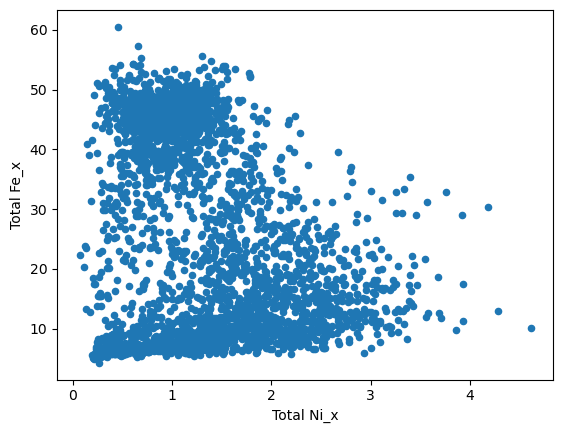

In [15]:
merged_df.plot(kind = 'scatter',x = 'Total Ni_x' , y = 'Total Fe_x')

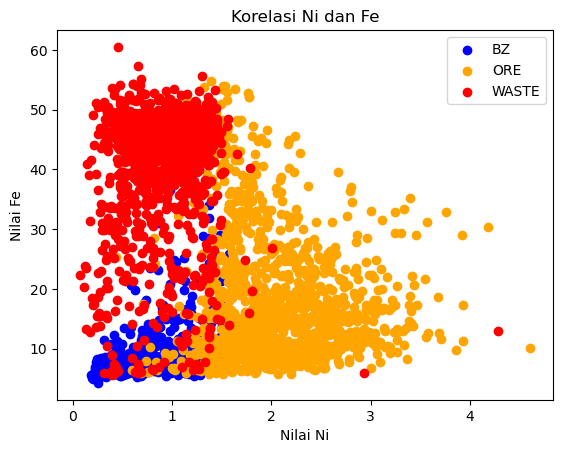

In [16]:
colors = {'BZ': 'blue', 'ORE': 'orange', 'WASTE': 'red'}
for LITOLOGI in colors.keys():
    subset = merged_df[merged_df['LITOLOGI'] == LITOLOGI]
    plt.scatter(subset['Total Ni_x'], subset['Total Fe_x'], color=colors[LITOLOGI], label=LITOLOGI)

#plt.scatter( merged_df['Total Ni_x'],merged_df['Total Fe_x'], color = 'green')
plt.xlabel('Nilai Ni')
plt.ylabel('Nilai Fe')
plt.title('Korelasi Ni dan Fe')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


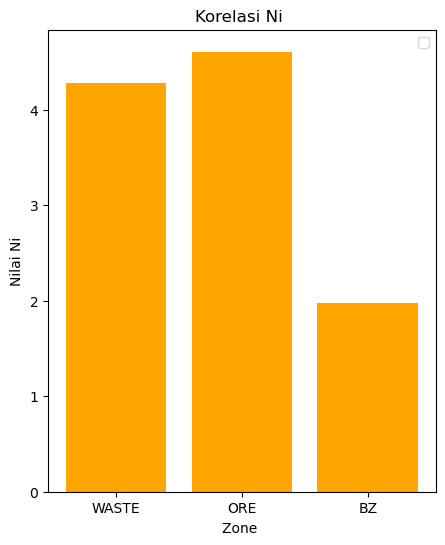

In [17]:
plt.figure(figsize = (5,6))
plt.bar( merged_df['LITOLOGI'],merged_df['Total Ni_x'], color = 'orange')
plt.xlabel('Zone ')
plt.ylabel('Nilai Ni')
plt.title('Korelasi Ni ')
plt.legend()
plt.show()

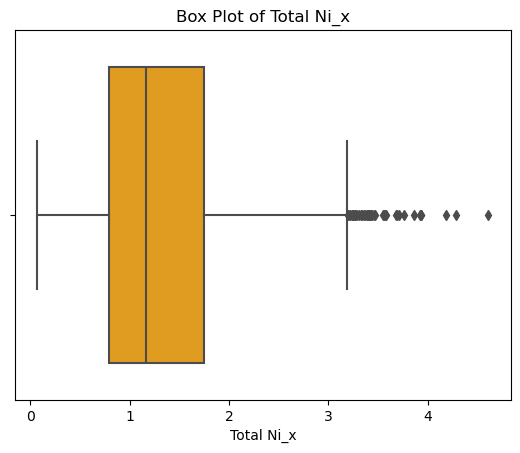

In [18]:
#Box Plot of Total Ni_x

sns.boxplot(x =merged_df['Total Ni_x'],color = 'orange')
plt.xlabel('Total Ni_x')
plt.title('Box Plot of Total Ni_x')
plt.show()

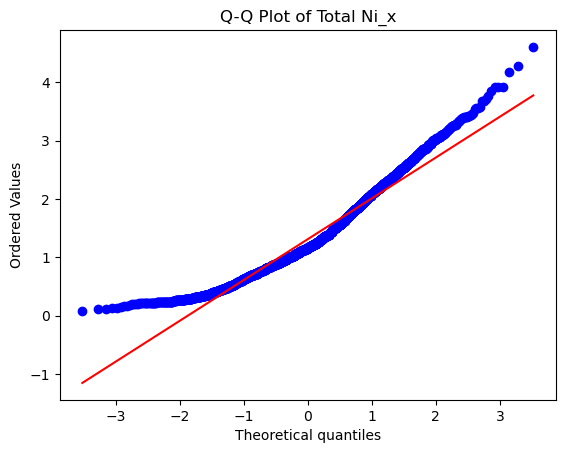

In [19]:
# Q-Q plot for 'Total Ni_x'


stats.probplot(merged_df['Total Ni_x'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Total Ni_x')
plt.show()

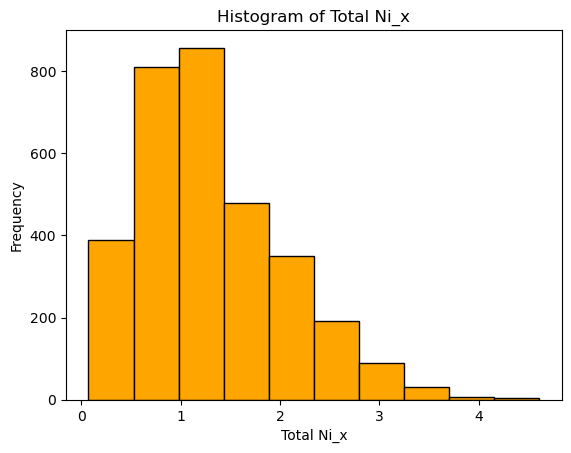

In [20]:
# Plot histogram for 'Total Ni_x'
plt.hist(merged_df['Total Ni_x'], bins=10, color='orange', edgecolor='black')
plt.xlabel('Total Ni_x')
plt.ylabel('Frequency')
plt.title('Histogram of Total Ni_x')
plt.show()

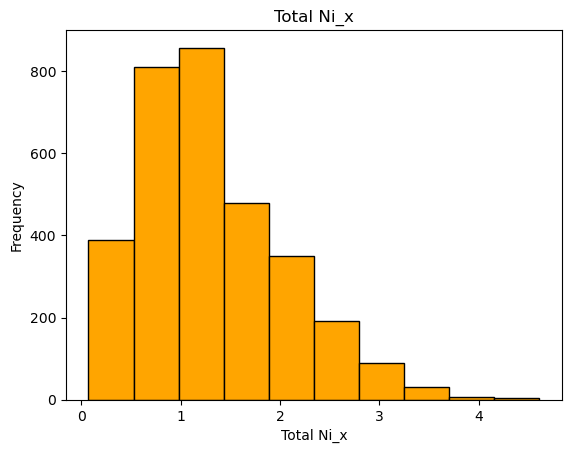

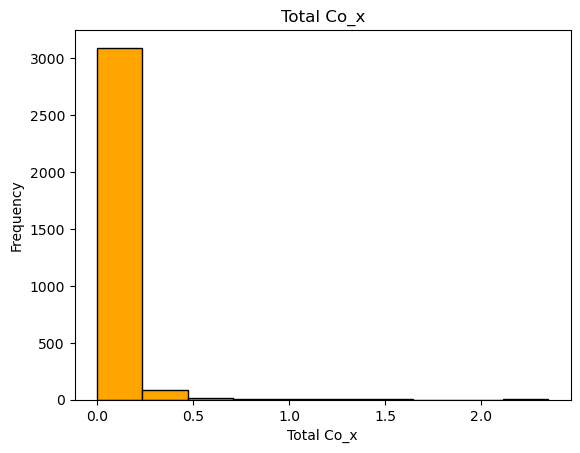

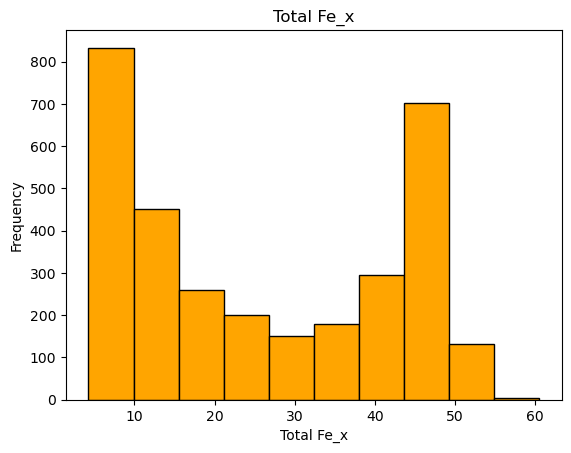

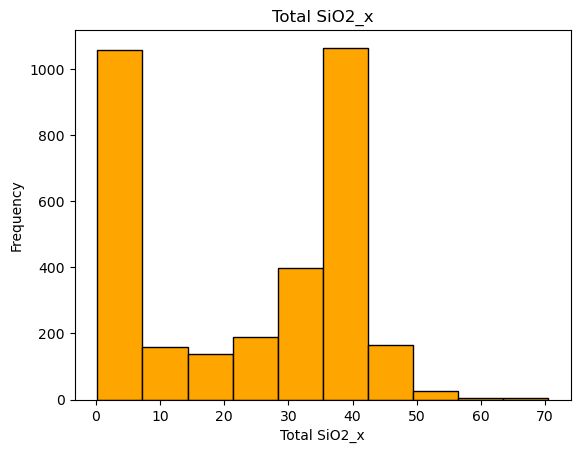

In [21]:
for label in merged_df.iloc[:,3:7]:
    plt.hist(merged_df[label], bins=10, color='orange', edgecolor='black')
    plt.xlabel(label)
    plt.ylabel('Frequency')
    plt.title(label)
    plt.show()

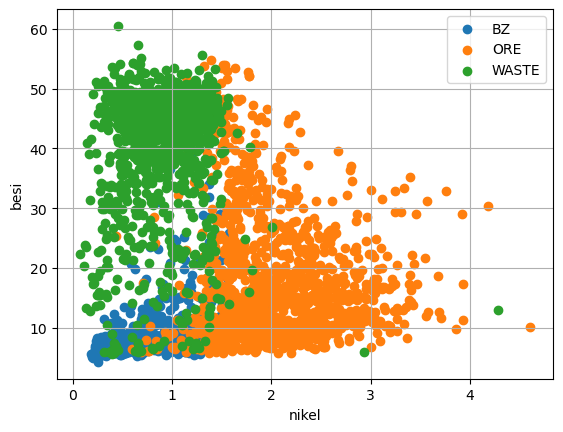

In [22]:
fig, az = plt.subplots()
for LITOLOGI, d in  merged_df.groupby('LITOLOGI'):
    az.scatter(d['Total Ni_x'], d['Total Fe_x'],label = LITOLOGI)

plt.legend(loc= 'upper right')
plt.xlabel('nikel')
plt.ylabel('besi')
plt.grid()
plt.show()

In [23]:
# Import file as csv

merged_df.to_csv(r'C:\Users\FERDI\OneDrive\Documents\LATIHAN\SQL\PANDAS\nama_file.csv', index=False)

DATA MODELING

Feature & Target

In [24]:
x = np.array(merged_df[['Total Ni_x','Total Co_x','Total Fe_x','Total SiO2_x','Total MgO_x']])
y = np.array(merged_df['LITOLOGI'])


In [25]:
print(x.shape)
print(y.shape)

(3205, 5)
(3205,)


In [26]:
print(x)
print(y)

[[5.000e-01 5.000e-02 4.620e+01 2.400e+00 1.500e+00]
 [7.200e-01 5.000e-02 4.440e+01 2.600e+00 1.600e+00]
 [8.900e-01 6.000e-02 4.480e+01 3.000e+00 1.600e+00]
 ...
 [9.500e-01 6.000e-02 8.220e+00 4.026e+01 3.358e+01]
 [4.000e-01 2.000e-02 6.790e+00 4.000e+01 3.563e+01]
 [3.900e-01 2.000e-02 6.460e+00 4.000e+01 3.679e+01]]
['WASTE' 'WASTE' 'WASTE' ... 'BZ' 'BZ' 'BZ']


In [27]:
#Konversi Label Menjadi Numerik

from sklearn.preprocessing import  OrdinalEncoder
encoder = OrdinalEncoder()
y = encoder.fit_transform(y.reshape(-1, 1))
y = y.flatten()
y

array([2., 2., 2., ..., 0., 0., 0.])

In [28]:
# Data Train and Data Test

from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split (x,
                                                       y,
                                                       test_size = 0.25,
                                                       random_state = 0)
print(x_train)
print(y_train)
                                                    
                                                        

[[1.640e+00 1.000e-02 7.000e+00 3.895e+01 3.121e+01]
 [1.110e+00 9.000e-02 3.780e+01 6.700e+00 1.900e+00]
 [2.800e-01 0.000e+00 1.550e+01 2.950e+01 3.000e-01]
 ...
 [2.130e+00 1.000e-02 7.900e+00 4.000e+01 3.170e+01]
 [1.380e+00 5.000e-02 4.790e+01 1.900e+00 4.000e-01]
 [1.090e+00 4.000e-02 4.350e+01 9.600e+00 3.000e-01]]
[1. 2. 2. ... 1. 2. 2.]


In [29]:
#Training KNN Regression Model

from sklearn.neighbors import KNeighborsClassifier

k = 6
model = KNeighborsClassifier(n_neighbors = k)
model.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=6)

In [30]:
# Prediction

y_pred = model.predict(x_test)
y_pred

array([0., 2., 1., 2., 2., 2., 0., 0., 1., 0., 1., 0., 1., 2., 2., 2., 0.,
       1., 2., 1., 0., 2., 2., 2., 1., 0., 2., 1., 2., 1., 1., 0., 1., 2.,
       1., 1., 2., 2., 2., 2., 1., 0., 2., 1., 1., 2., 1., 1., 2., 2., 1.,
       2., 1., 2., 1., 2., 2., 2., 1., 1., 1., 2., 1., 2., 1., 1., 1., 2.,
       0., 1., 0., 2., 0., 0., 2., 1., 2., 0., 1., 2., 2., 0., 1., 0., 0.,
       2., 2., 2., 2., 2., 2., 1., 2., 1., 1., 2., 1., 1., 2., 1., 2., 1.,
       0., 2., 2., 0., 0., 0., 2., 1., 1., 1., 2., 0., 1., 0., 0., 1., 2.,
       1., 2., 1., 2., 0., 1., 1., 2., 1., 1., 2., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 2., 0., 2., 1.,
       1., 1., 1., 2., 1., 2., 1., 1., 0., 2., 1., 2., 1., 0., 2., 2., 2.,
       1., 2., 2., 2., 0., 2., 1., 1., 2., 1., 0., 2., 2., 2., 0., 2., 2.,
       0., 0., 1., 1., 2., 2., 1., 1., 1., 2., 1., 0., 0., 1., 0., 2., 2.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 2., 2., 1., 1., 0., 1., 2., 1.,
       1., 2., 2., 2., 0.

In [31]:
x_new = np.array([[0.91,	0.04,	17.30,	33.40,	28.10]])
y_pred1 = model.predict(x_new)
y_pred1

array([0.])

MODEL EVALUATION

In [32]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test,y_pred)

print(class_report)

              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77       161
         1.0       0.84      0.82      0.83       314
         2.0       0.94      0.93      0.93       327

    accuracy                           0.86       802
   macro avg       0.84      0.85      0.85       802
weighted avg       0.86      0.86      0.86       802

